In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

from jqmcvi import base

binned_data = pd.read_csv("data/binned_time_series.csv")

In [11]:
#drop cols with more than 110000 nans
data_no_nan = binned_data[binned_data.columns[binned_data.isnull().sum()<50000]]

#drop rows with nans, first col, and patient id/offset
final_data = data_no_nan.dropna()
final_data = final_data.drop(final_data.columns[[0, -1, -2]], axis = 1)
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(final_data)
#plot the scatterplot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
#plt.subplot(1,2,1)
plt.scatter(x = final_data.Hct, y = final_data.BUN, c = color_theme[clustering.labels_], s = 50)
plt.title('Ground Truth')

,BUN,Hct,Hgb,MCH,MCHC,MCV,RBC,RDW,WBC x 1000,anion gap,bicarbonate,calcium,chloride,creatinine,glucose,platelets x 1000,potassium,sodium
0,42.0,24.7,7.8,29.2,31.6,92.5,2.67,15.3,8.0,15.0,20.0,7.5,95.0,6.70,97.0,290.0,4.9,130.0
1,42.0,24.7,7.8,29.2,31.6,92.5,2.67,15.3,8.0,15.0,20.0,7.5,95.0,6.70,97.0,290.0,4.9,130.0
2,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
3,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
4,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126307,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126308,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126309,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126310,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0


In [64]:
new_df = binned_data[['hr', 'sao2', 'resp']]
new_df = new_df.dropna().reset_index()
small_df = new_df.drop(range(50000))
silhouette = {}
for k in range(2,10):
    clustering = KMeans(n_clusters = k)
    cluster_labels = clustering.fit_predict(new_df)
    #Silhouette
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    silhouette[k] = silhouette_avg
    #print(clusters)
    #dunn[k] = base.dunn(clusters)
    
    #inertia calculation
    #sse[k] = clustering.inertia_


For n_clusters = 2 The average silhouette_score is : 0.7061020386440597
For n_clusters = 3 The average silhouette_score is : 0.6076131479384287
For n_clusters = 4 The average silhouette_score is : 0.5980146781619212
For n_clusters = 5 The average silhouette_score is : 0.5967888224015534
For n_clusters = 6 The average silhouette_score is : 0.5920702576792626
For n_clusters = 7 The average silhouette_score is : 0.5821613537993492
For n_clusters = 8 The average silhouette_score is : 0.5829524406952555
For n_clusters = 9 The average silhouette_score is : 0.5682047258150694


In [89]:
new_df = binned_data[['hr', 'sao2', 'resp']]
new_df = new_df.dropna().reset_index()
print(new_df)
small_df = new_df.drop(range(50000))
#print(small_df)
silhouette_mean = {}
for k in range(2,10):
    clustering = MeanShift(bandwidth = k).fit(small_df)
    cluster_labels = clustering.fit_predict(small_df)
    #Silhouette
    silhouette_avg = silhouette_score(small_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_mean[k] = silhouette_avg
    #print(clusters)
    #dunn[k] = base.dunn(clusters)
    
    #inertia calculation
    #sse[k] = clustering.inertia_


        index         hr       sao2       resp
0          24  93.000000  99.000000  15.916667
1          25  78.666667  98.916667  17.416667
2          26  80.250000  96.500000  15.250000
3          27  76.250000  96.250000  15.666667
4          28  82.833333  95.750000  20.166667
...       ...        ...        ...        ...
66787  126283  85.500000  96.750000  24.250000
66788  126284  85.916667  96.333333  24.500000
66789  126285  90.083333  96.250000  24.083333
66790  126286  96.416667  95.000000  25.666667
66791  126287  98.916667  95.416667  26.666667

[66792 rows x 4 columns]
For n_clusters = 2 The average silhouette_score is : 0.20343829113202483
For n_clusters = 3 The average silhouette_score is : 0.3108813704517538
For n_clusters = 4 The average silhouette_score is : 0.36968126791492395
For n_clusters = 5 The average silhouette_score is : 0.39442256872202175
For n_clusters = 6 The average silhouette_score is : 0.4209494220625845
For n_clusters = 7 The average silhouette_score

0
1902


Text(0,0.5,'Silhouette Score')

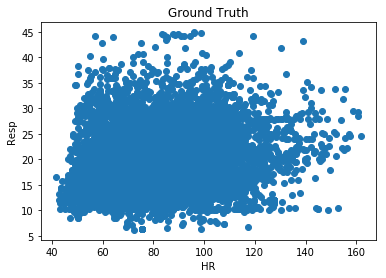

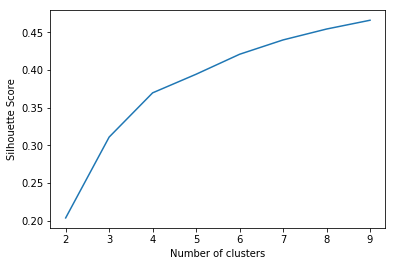

In [96]:
#plot the scatterplot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'blue', 'green', 'yellow', 'black', 'orange', 'purple'])
print(min(clustering.labels_))
print(max(clustering.labels_))
plt.scatter(x = small_df.hr, y = small_df.resp)#, c = color_theme[clustering.labels_])
plt.title('Ground Truth')
plt.xlabel("HR")
plt.ylabel("Resp")

# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")

plt.figure()
plt.plot(list(silhouette_mean.keys()), list(silhouette_mean.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")


number of estimated clusters : 3


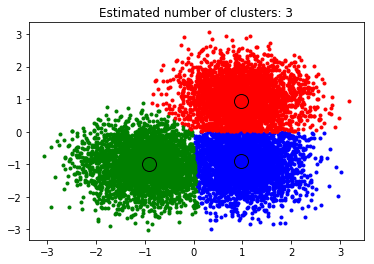

In [68]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()